#  AI ML Cohort 4 : Group 1

## Un-Supervised Learning : Mini Project 2 - D1

##  Student Names :

    ## Chandresh Khaneja | 2020AIML062 
    ## Sudhir Valluri    | 2020AIML001
    ## Sudheendran T L   | 2020AIML003

## File Name : Final_Miniproject2_Group1.ipynb 

## Date of Submission : Sun 06-Jun-2021

## Declaration of libraries as required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import json
import glob
import nltk
import sklearn
import re
import math
from scipy import stats
from random import sample
from math import isnan

# Import Library to perform PCA / TSNE (for Dimensionality Reduction)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Import Library to perform some metrics
from sklearn import metrics

#Import Library to perform Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Import Libraries related to nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Import libraries related to vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Import Libraries related to apriori algorithim
from mlxtend.frequent_patterns import apriori, association_rules
from apyori import apriori

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Acquisition / Collection / Extraction : Retrieve Metadata

In [3]:
df = pd.read_csv('CORD19-10k.csv',names=['title'])
df.head()

,title
0,Clinical features of culture-proven Mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense
3,Role of endothelin-1 in lung disease
4,Gene expression in epithelial cells in respons...


In [4]:
df.head(5)

,title
0,Clinical features of culture-proven Mycoplasma...
1,Nitric oxide: a pro-inflammatory mediator in l...
2,Surfactant protein-D and pulmonary host defense
3,Role of endothelin-1 in lung disease
4,Gene expression in epithelial cells in respons...


In [5]:
df.shape

(10000, 1)

# Pre - processing / Feature Engineering

## Checking for Info of Cord19-10k Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


## Data Cleaning : Check for Null values of Cord19-10k Dataset 

### To Confirm nature of Title Column for any presence of NULL / NaN / Missing values etc. in any columns

In [7]:
df.isnull().values.any()

False

## Data Cleaning : Check for Missing Values of Cord19-10k Dataset

In [8]:
df.isnull().sum()

title    0
dtype: int64

In [9]:
#!pip install nltk

In [10]:
df.isna().count()

title    10000
dtype: int64

# Q1).	You take the CORD19-10k as input, and convert titles into corresponding feature vectors as below. [4 points]

## Q1a).	Perform pre-processing step of stopword removal from title text of all articles.  [1 pt]

In [11]:
stop = nltk.corpus.stopwords.words('english')
extraStopWords = ['The', 'A', 'in','et','al', 'al.', '(', ')', ',', '.', ':', ';', '%', '#', '@', '&', '!', '?', '[', ']', "''", "``", "'", '..', '...', '/', '-', '--', '>', '<', '=', '+', '\\']
stop.extend(extraStopWords)

In [12]:
df['title'] = df['title'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [13]:
df['title'].values

array(['Clinical features culture-proven Mycoplasma pneumoniae infections King Abdulaziz University Hospital, Jeddah, Saudi Arabia',
       'Nitric oxide: pro-inflammatory mediator lung disease?',
       'Surfactant protein-D pulmonary host defense', ...,
       'Integrated bus transit scheduling Beijing bus group based unified mode operation',
       'Antiviral Antibodies Dogs Netherlands',
       'Structural Functional Characterization Gene Products Encoded Human Genome Homology Detection'],
      dtype=object)

In [14]:
clean_text = []

def normalizeDoc(txt):
    for i in range(0,len(txt)):
        myText = txt[i]
        myText = re.sub(r'[^a-zA-Z0-9\s]','', myText, re.I) #Says match anything EXCEPT letters and numbers or whitespaces and turn them into blanks.
        myText = re.sub(r'\b[a-zA-Z]\b', '', myText, re.I) #removes single letters like ' a ' ' b ' surrounded by spaces
        myText = re.sub(r'\b\d*\b', '', myText) #Matches any number surrounded by word boundaries and removes them.
        myText = re.sub(r'\b\d.*\b', '', myText) #Matches any word starting in a number, and removes them. There is a LOT of junk like 2n, 2r, 3bc, 3d7, stuff like that.
        myText = re.sub(r'\b[a-zA-Z]\d*\b', '', myText) #Matches works like a12334 and a11111111, b24, stuff like this. These words tend to reference specific antibodies, compounds, etc. Not super useful for clustering.
        myText = myText.lower()
        myText = myText.strip()
        myText = ''.join([j if ord(j) < 128 else ' ' for j in myText])
        tokens = nltk.word_tokenize(myText)
        clean_tokens = [t for t in tokens if t not in stop]
        clean_text.append(' '.join(clean_tokens))
        if i % 100 == 0:
            print("text " + str(i) + " tokens cleaned ("+ str(round(i/len(txt)*100,ndigits=2)) + "% complete)")
        if i == len(txt) - 1:
            print("text " + str(i) + " tokens cleaned (100% complete)")

In [15]:
normalizeDoc(df['title'].values)
len(clean_text)

text 0 tokens cleaned (0.0% complete)
text 100 tokens cleaned (1.0% complete)
text 200 tokens cleaned (2.0% complete)
text 300 tokens cleaned (3.0% complete)
text 400 tokens cleaned (4.0% complete)
text 500 tokens cleaned (5.0% complete)
text 600 tokens cleaned (6.0% complete)
text 700 tokens cleaned (7.0% complete)
text 800 tokens cleaned (8.0% complete)
text 900 tokens cleaned (9.0% complete)
text 1000 tokens cleaned (10.0% complete)
text 1100 tokens cleaned (11.0% complete)
text 1200 tokens cleaned (12.0% complete)
text 1300 tokens cleaned (13.0% complete)
text 1400 tokens cleaned (14.0% complete)
text 1500 tokens cleaned (15.0% complete)
text 1600 tokens cleaned (16.0% complete)
text 1700 tokens cleaned (17.0% complete)
text 1800 tokens cleaned (18.0% complete)
text 1900 tokens cleaned (19.0% complete)
text 2000 tokens cleaned (20.0% complete)
text 2100 tokens cleaned (21.0% complete)
text 2200 tokens cleaned (22.0% complete)
text 2300 tokens cleaned (23.0% complete)
text 2400 toke

10000

In [16]:
clean_text

['clinical features cultureproven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia',
 'nitric oxide proinflammatory mediator lung disease',
 'surfactant proteind pulmonary host defense',
 'role endothelin1 lung disease',
 'gene expression epithelial cells response pneumovirus infection',
 'sequence requirements rna strand transfer nidovirus discontinuous subgenomic rna synthesis',
 'debate transfusing normal haemoglobin levels improve outcome',
 '',
 'heme oxygenase1 carbon monoxide pulmonary medicine',
 'technical description rods realtime public health surveillance system',
 'conservation polyamine regulation translational frameshifting yeast mammals',
 'heterogeneous nuclear ribonucleoprotein regulates rna synthesis cytoplasmic virus',
 'method identify p62s uba domain interacting proteins',
 'vaccinia virus infection disrupts microtubule organization centrosome function',
 'site origin influenza pandemic public health implications',
 'multifac

# Perform Vectorization

## Q1b).	For each title text, convert it into corresponding TF-IDF vector. [1 pt]

In [17]:
vectorizer = TfidfVectorizer(max_features=2 ** 15)
X = vectorizer.fit_transform(clean_text)
print(vectorizer.get_feature_names())

['a0201restricted', 'a1166c', 'a2a', 'a59induced', 'aacr', 'aan', 'aav', 'aav8mediated', 'ab', 'abbreviated', 'abbreviations', 'abc', 'abcb1', 'abcd', 'abcgefahrenlagen', 'abdominal', 'abdulaziz', 'aberrant', 'abgabensystem', 'abgebrochenen', 'abgesagt', 'abilities', 'ability', 'abkl', 'ablation', 'ablative', 'abnormal', 'abnormalities', 'aboincompatible', 'abordaje', 'aboriginal', 'abortion', 'abortive', 'abortus', 'abortusovis', 'abroad', 'abrogates', 'abrogating', 'abruzzo', 'abscess', 'abscesses', 'abseits', 'absence', 'absetzen', 'absolute', 'absolutely', 'absorption', 'absorptive', 'abstract', 'abstracts', 'abundance', 'abundant', 'abuse', 'abusers', 'acacetin', 'academia', 'academic', 'academics', 'academy', 'acanthamoeba', 'acari', 'acat1', 'acbd3', 'accelerate', 'accelerates', 'accelerating', 'acceleration', 'accept', 'acceptability', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accident', 'accidental', 'accidents', 'acciones', 'acclimation'

In [18]:
X.shape

(10000, 16486)

## Q1c)	TF-IDF vectors are sparse and of large dimension. Reduce them into only 2 dimensions using PCA. [2 pt]

# Perform PCA

In [19]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X.toarray())
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [20]:
X_principal

,P1,P2
0,-0.001941,0.038272
1,0.016939,0.031092
2,0.010029,0.007764
3,0.014871,0.036984
4,-0.054154,-0.060302
...,...,...
9995,-0.028739,-0.010133
9996,0.018828,-0.022169
9997,0.028648,-0.003308
9998,0.019916,-0.019439


#  Q2).	Perform K-means clustering for different values of K (2,3,4,5) and evaluate the quality of clustering using Silhouette score. [4 points]

In [21]:
# run kmeans with many different k
distortions = []
K = range(2, 6)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X_principal)
    k_means.fit(X_principal)
    distortions.append(sum(np.min(cdist(X_principal, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

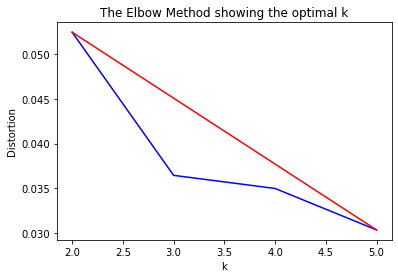

In [22]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Q2a).	For each value of K, plot clusters (all cluster points in same cluster with same color, cluster points in different cluster in different colors). [2 pt]

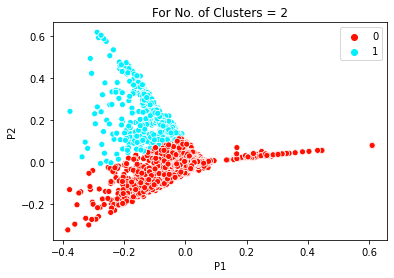

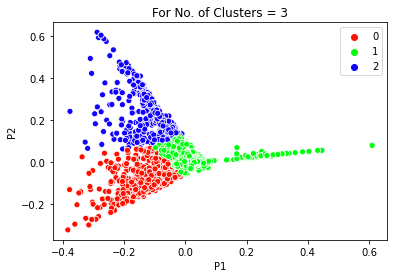

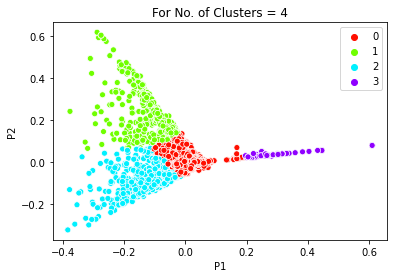

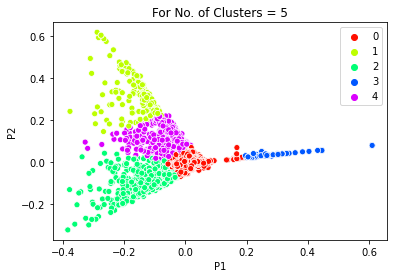

In [24]:
for k in range(2,6):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X_principal)
    df['y'] = y_pred

    # plot
    palette = sns.hls_palette(k, l=0.5, s=1)
    sns.scatterplot(X_principal['P1'], X_principal['P2'], hue=y_pred, legend='full', palette=palette)
    plt.title('For No. of Clusters = '+str(k))
    plt.show()

## Plot Elbow Curve and SSE Curve

For n_clusters=2, the silhouette score is 0.7108599222419525
For n_clusters=2, the SSE score is 66.65369770506524


For n_clusters=3, the silhouette score is 0.6401472027177003
For n_clusters=3, the SSE score is 41.993146240085366


For n_clusters=4, the silhouette score is 0.6679641775814509
For n_clusters=4, the SSE score is 27.419762178342168


For n_clusters=5, the silhouette score is 0.6696183982694536
For n_clusters=5, the SSE score is 20.75389759671312




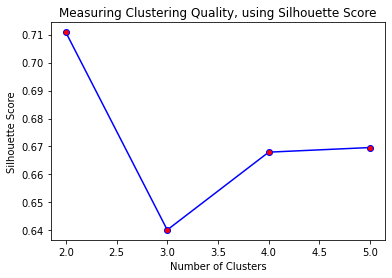

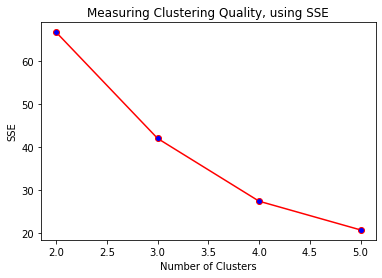

In [25]:
ss = []
sse = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k).fit(X_principal)
    ss.append([k,silhouette_score(X_principal,kmeans.labels_)])
    sse.append([k,kmeans.inertia_])
    silhouette_avg = silhouette_score(X_principal,kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k,silhouette_avg))
    print("For n_clusters={0}, the SSE score is {1}".format(k,kmeans.inertia_))
    print("\n")
    
# Plotting for Silhouette Score & SSE
temp = pd.DataFrame(ss)
plt.plot(temp[0], temp[1], color='b', marker = 'o', markerfacecolor = 'r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title("Measuring Clustering Quality, using Silhouette Score")
plt.show()

# Plotting for SSE 
temp1= pd.DataFrame(sse)
plt.plot(temp1[0], temp1[1], color='r', marker = 'o', markerfacecolor = 'b')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Measuring Clustering Quality, using SSE")
plt.show()

## Q2b).	Draw a bar graph with X-axis as K value and Y-axis as silhouette score. [1 pt]

For n_clusters=2, the silhouette score is 0.7108599222419525
For n_clusters=3, the silhouette score is 0.6401472027177003
For n_clusters=4, the silhouette score is 0.6679641775814509
For n_clusters=5, the silhouette score is 0.6692124529720673


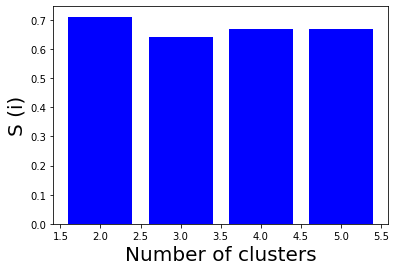

In [26]:
ss = []
for k in range(2,6):
    kmeans = KMeans(n_clusters=k).fit(X_principal)
    ss.append(silhouette_score(X_principal,kmeans.labels_))
    silhouette_avg = silhouette_score(X_principal,kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k,silhouette_avg))

k=[2,3,4,5]
plt.bar(k, ss,color='b')
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S (i)', fontsize = 20)
plt.show()

## For n_clusters = 4 have Silhouette Score = 0.6679

## Q2c)	Explain (1-2 lines) which is the best clustering and why. [1 pt]

## Answer 2c). 

## Inference : From the Silhouette Score(s) and SSE values plotted, the 'Best Cluster' is 4

In [27]:
#nltk.download()

In [28]:
#!pip install apyori

In [29]:
df_cleantext = pd.DataFrame(clean_text,columns=['title'])
df_cleantext.head()

,title
0,clinical features cultureproven mycoplasma pne...
1,nitric oxide proinflammatory mediator lung dis...
2,surfactant proteind pulmonary host defense
3,role endothelin1 lung disease
4,gene expression epithelial cells response pneu...


# 3).	Consider the pre-processed title text of all articles and find words which frequently occur together. [4 points]


In [30]:
records = []
total_rows = df_cleantext.shape[0]
for i, row in df_cleantext.iterrows():
    records.append(word_tokenize(row.iat[0]))

In [31]:
def apply_apriori(records, min_support, min_confidence, min_lift, min_length):
    association_rules = apriori(records, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, min_length=min_length)
    return list(association_rules)

In [32]:
def print_association_results(association_results):
    for item in association_results:

        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")

# 3a)	More specifically, find association rules of minimum length 2 with 20% confidence and 10% support. Other parameters you are free to decide on your own. How many such rules are there? List all the rules. Interpret any one rule. [2 pt]


In [33]:
results = pd.DataFrame(columns = ['Support(%)', 'Confidence(%)', 'Total Association Results'])

#Define Confidence Range from 0% to 100%
confidence_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

#Define Support values from 0.5%, 1%, 10%
support_vals = [0.005,0.01,0.1,0.2, 0.5]
association_results1 = 0
for i in confidence_range:
    for j in support_vals:
        association_results = apply_apriori(records, min_support=j, min_confidence=i, min_lift=2, min_length=2)
        if association_results1 == 0:
            association_results1 = association_results
        results = results.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, 
                 ignore_index = True)

In [34]:
results

,Support(%),Confidence(%),Total Association Results
0,0.5,0.0,64.0
1,1.0,0.0,17.0
2,10.0,0.0,0.0
3,20.0,0.0,0.0
4,50.0,0.0,0.0
5,0.5,10.0,64.0
6,1.0,10.0,17.0
7,10.0,10.0,0.0
8,20.0,10.0,0.0
9,50.0,10.0,0.0


In [35]:
results['Total Association Results'].sum()

538.0

## 3a-1). 

## Total Number of Rules found : 538 (spread across 55 combination rows for Support %, Confidence %)

### i). For the specified Support of 10%, Confidence of 20% and Min Length of 2, the Association Rules found are 0. (Refer Row #12 in table above)


### ii). For the Support  of 0.5%, Confidence of 10% and Min Length of  2, the Association Rules found are 64. (Refer Row #5 in table above)


### iii). For the Support  of 1%, Confidence of 20% and Min Length of  2, the Association Rules found are 16. (Refer Row #11 in table above)



## Q3a). List all the rules

## Printing the All Association Rules along with Corresponding Support, Confidence, Lift

In [36]:
print_association_results(association_results1)

Rule: distress -> acute
Support: 0.0104
Confidence: 0.268733850129199
Lift: 23.368160880799913
Rule: acute -> injury
Support: 0.0072
Confidence: 0.18604651162790697
Lift: 14.311270125223613
Rule: acute -> lung
Support: 0.0074
Confidence: 0.19121447028423774
Lift: 8.691566831101715
Rule: acute -> patients
Support: 0.0053
Confidence: 0.13695090439276486
Lift: 3.0501315009524466
Rule: acute -> respiratory
Support: 0.0199
Confidence: 0.5142118863049097
Lift: 9.40058293061992
Rule: severe -> acute
Support: 0.0062
Confidence: 0.16020671834625322
Lift: 7.282123561193329
Rule: acute -> syndrome
Support: 0.0133
Confidence: 0.34366925064599485
Lift: 12.186852859787052
Rule: avian -> influenza
Support: 0.0118
Confidence: 0.6900584795321637
Lift: 8.669076376032207
Rule: avian -> virus
Support: 0.0066
Confidence: 0.38596491228070173
Lift: 2.953059772614397
Rule: infectious -> bronchitis
Support: 0.005
Confidence: 0.8771929824561403
Lift: 33.48064818534886
Rule: intensive -> care
Support: 0.0083
Con

## 3a-2). Interpretation of Any One Rule : 

### Taking the First Rule in the Output above:

### Rule: acute -> distress
### Support: 0.0104
### Confidence: 0.268733850129199
### Lift: 23.368160880799913

### Narration : 
### i). The word 'acute' has a support of 0.0104 (1.04%). This means that the word 'acute' occurs in 1.04% of the titles from the overall number of 'Titles'

### ii). The value Confidence of 0.268 (26.8%) indicates how frequently the word 'distress' occurs after the word 'acute' in the same 'Title'.

### iii). The Lift value of 23.36 indicates that the word 'distress' is very likely to follow the word 'acute' in the 'Titles'. 

# 3b). Draw a line graph with Y-axis as number of Association Rules of minimum length 2, and X-axis as Confidence Percentage (ranging from 0%, 10%, 20%, ...., 100%). 
# Plot different coloured lines for different support percentage (take values as 10%, 20%, and 50%) [2 pt] 

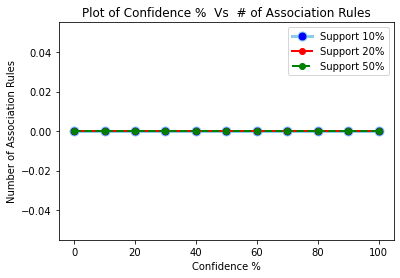

In [37]:
results1 = pd.DataFrame(columns = ['Support(%)', 'Confidence(%)', 'Total Association Results'])
results2 = results1
results3 = results1
        
#Define Confidence Range from 0% to 100%
confidence_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in confidence_range:
    
    #Support value 10%
    association_results = apply_apriori(records, min_support=0.1, min_confidence=i, min_lift=2, min_length=2)
    results1 = results1.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, ignore_index = True)

    #Support value 20%
    association_results = apply_apriori(records, min_support=0.2, min_confidence=i, min_lift=2, min_length=2)
    results2 = results2.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, ignore_index = True)

    #Support value 50%
    association_results = apply_apriori(records, min_support=0.5, min_confidence=i, min_lift=2, min_length=2)
    results3 = results3.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, ignore_index = True)
        
plt.plot('Confidence(%)', 'Total Association Results', data=results1, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=3,label="Support 10%")
plt.plot('Confidence(%)', 'Total Association Results', data=results2, marker='o', color='red', linewidth=2,label="Support 20%")
plt.plot('Confidence(%)', 'Total Association Results', data=results3, marker='o', color='green', linewidth=2, linestyle='dashed', label="Support 50%")
plt.xlabel('Confidence %')
plt.ylabel('Number of Association Rules')
plt.title('Plot of Confidence %  Vs  # of Association Rules')
plt.legend()

# Important Note For BITS Pilani TA and Professor : 
## 1). After observing the Plot above for Support %, Confidence %, Total Association Results, we find that for Support of 10%, 20% and 50% the Total Association Results are coming as 0. 

## 2). Based on #1 above, it is not possible to Plot graphs as mentioned in Question 3b.

## 3). Therefore Group1 has made a decision to consider Support % as 0.5, 1 and 2.

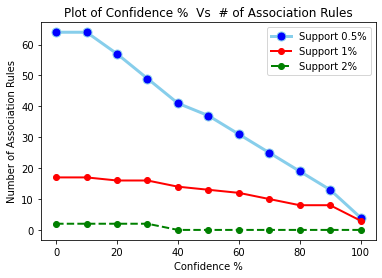

In [38]:
results1 = pd.DataFrame(columns = ['Support(%)', 'Confidence(%)', 'Total Association Results'])
results2 = results1
results3 = results1

#Define Confidence Range from 0% to 100%
confidence_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in confidence_range:

    #Support value 0.5%
    association_results = apply_apriori(records, min_support=0.005, min_confidence=i, min_lift=2, min_length=2)
    results1 = results1.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, ignore_index = True)

    #Support value 1%
    association_results = apply_apriori(records, min_support=0.01, min_confidence=i, min_lift=2, min_length=2)
    results2 = results2.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, ignore_index = True)

    #Support value 2%
    association_results = apply_apriori(records, min_support=0.02, min_confidence=i, min_lift=2, min_length=2)
    results3 = results3.append({'Support(%)' : j*100, 'Confidence(%)' : i*100, 'Total Association Results' : len(association_results)}, ignore_index = True)
        
plt.plot('Confidence(%)', 'Total Association Results', data=results1, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=3,label="Support 0.5%")
plt.plot('Confidence(%)', 'Total Association Results', data=results2, marker='o', color='red', linewidth=2,label="Support 1%")
plt.plot('Confidence(%)', 'Total Association Results', data=results3, marker='o', color='green', linewidth=2, linestyle='dashed', label="Support 2%")
plt.xlabel('Confidence %')
plt.ylabel('Number of Association Rules')
plt.title('Plot of Confidence %  Vs  # of Association Rules')
plt.legend()